# Predicting House Prices in California with `LinearRegression()`

In this lab you will start inspect, analyze, visualize house price data from different districts in California, US. After having performed analysis, EDA and some feature engineering, you will build your own `LinearRegression()`  with `SkLearn`. 

# Part 1 - Inspection and Cleaning


#### Import and Inspect your data

Read the `housing.csv` file and make use of some methods to understand your data better. Below is an explanation of the features you are going to work with:

1. **longitude:**  geographical coordinate, east to west position of district
2. **latitude:**  geographical coordinate, north to south position of district
3. **housing_median_age:** the median age of houses in district
4. **total_rooms** Sum of all rooms in district
5. **total_bedrooms** Sum of all bedrooms in district
6. **population:** total population in district
7. **households:** total households in district
8. **median_income:** median household income in district 
9. **median_house_value:** median house value in district
10. **ocean_proximity:** District´s proximity to the ocean

In [96]:
import pandas as pd
housing = pd.read_csv("../data/housing.csv")
#housing = pd.get_dummies(housing, columns=['ocean_proximity'])
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [97]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Histograms
Make histograms of all your numeric columns in order to get a good understanding of the distribution of your data points. What do you see?

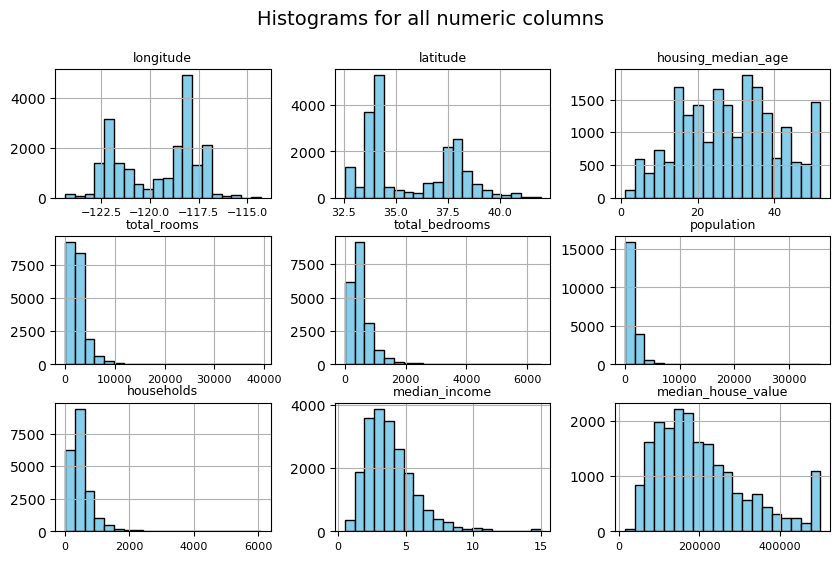

In [98]:
import matplotlib.pyplot as plt
axes = housing.hist(
    bins=20,           # number of bins
    figsize=(10, 6),   # overall figure size
    color='skyblue',
    edgecolor='black',
    xlabelsize=8, 
)

for ax in axes.flatten():
    ax.title.set_fontsize(9) 

plt.suptitle("Histograms for all numeric columns", fontsize=14)
plt.show()

#### Let's create some features a tidy up our data

1. Locate your NaN values and make a decision on how to handle them. Drop, fill with mean, or something else, it is entirely up to you. 

In [99]:
pd.set_option('display.max_rows', None)
housing[housing.isna().any(axis=1)]
print('I will use a linear regression to predict the number of bedrooms based on complete data points')

I will use a linear regression to predict the number of bedrooms based on complete data points


In [100]:
import numpy as np
from sklearn.linear_model import LinearRegression


df = housing.dropna()
na_df = housing[housing.isna().any(axis=1)]
na_df_fixed = na_df.copy()

fillna_df = df[['total_rooms', 'population', 'total_bedrooms']]

X_train= np.asanyarray(fillna_df[['total_rooms', 'population']])
y_train= np.asanyarray(fillna_df[['total_bedrooms']])
X_test = np.asanyarray(na_df[['total_rooms', 'population']])

na_model = LinearRegression()
na_model.fit(X_train,y_train)
y_pred = na_model.predict(X_test)

na_df_fixed['total_bedrooms'] = np.round(y_pred).astype(int)

housing_clean = pd.concat([df, na_df_fixed], ignore_index=True)

2. Create three new columns by using simple arithmetic operations. Create one column with "rooms per household", one with "population per household",  and one with "bedrooms per room".

In [101]:
housing_clean['rooms_per_household'] = housing_clean['total_rooms']  / housing_clean['households'] 

In [102]:
housing_clean['population_per_household'] = housing_clean['population']  / housing_clean['households'] 

In [103]:
housing_clean['bedrooms_per_room'] = housing_clean['total_bedrooms']  / housing_clean['total_rooms'] 

3. If you check the largest and smallest values of your "rooms per houshold column" you will see two outliers and two values that are just wrong. Drop the four values by index.

In [104]:
max_outlier = list(housing_clean.sort_values(by='rooms_per_household', ascending=False).head(2).index)
min_outlier = list(housing_clean.sort_values(by='rooms_per_household', ascending=True).head(2).index)
outliers = max_outlier + min_outlier
print(len(housing_clean))
houses_ready = housing_clean.drop(index=outliers)
print(len(houses_ready))


20640
20636


# Part 2 - Exploratory Data Analysis



#### Let's find out what factors have an influence on our predicting variable

1. Let's check out the distribution of our "median house value". Visualize your results with 100 bins.

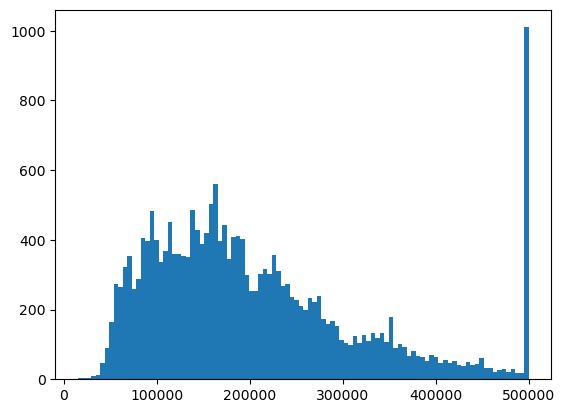

In [105]:
plt.hist(houses_ready['median_house_value'], bins=100)
plt.show()

2. Check out what variables correlates the most with "median house value"

In [107]:
# import seaborn as sns
# corr = houses_ready.corr()
# plt.figure(figsize=(10,8))
# sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

houses_ready.drop(columns=['ocean_proximity']).corr()['median_house_value'].sort_values(ascending=False)



median_house_value          1.000000
median_income               0.688369
rooms_per_household         0.171586
total_rooms                 0.134173
housing_median_age          0.105653
households                  0.065927
total_bedrooms              0.050731
population_per_household   -0.023743
population                 -0.024598
longitude                  -0.045911
latitude                   -0.144413
bedrooms_per_room          -0.257446
Name: median_house_value, dtype: float64

3. Let's check out the distribution of the column that has the highest correlation to "median house value". Visualize your results with 100 bins.

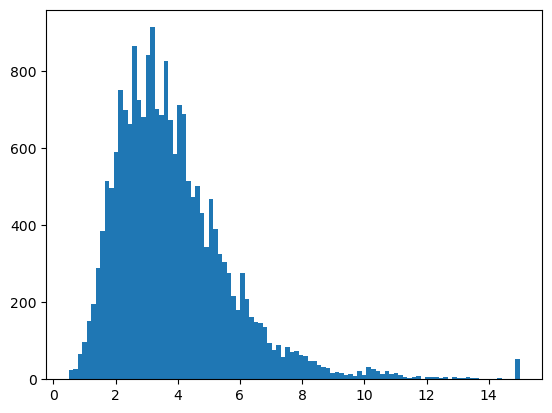

In [108]:
plt.hist(houses_ready['median_income'], bins=100)
plt.show()

4. Visualize the "median house value" and "median income" in a jointplot (kind="reg"). What do you see?

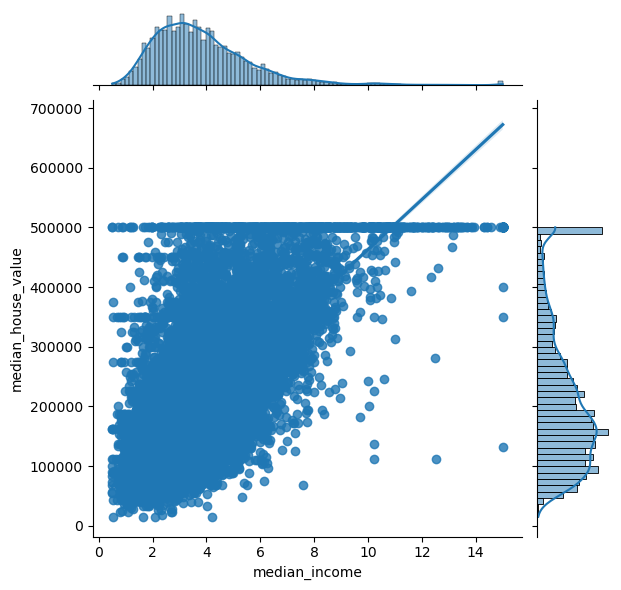

In [109]:
sns.jointplot(
    x='median_income',
    y='median_house_value',
    data=houses_ready,
    kind='reg'
)
plt.show()

5. Make the same visualization as in the above, but, cahnge the kind parameter to "kde". What extra information does this type of visualization convey, that the one in the above does not?

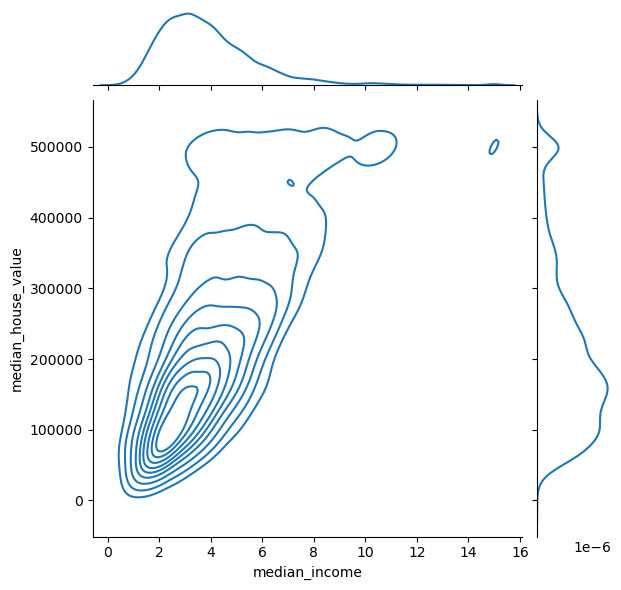

The KDE version of the Jointplot conveys where most of the observations are concetrated


In [110]:
sns.jointplot(
    x='median_income',
    y='median_house_value',
    data=houses_ready,
    kind='kde'
)
plt.show()

print(f"""The KDE version of the Jointplot conveys where most of the observations are concetrated""")

#### Let's get schwifty with some EDA

1. Create a new categorical column from the "median income" with the following quartiles `[0, 0.25, 0.5, 0.75, 0.95, 1]` and label them like this `["Low", "Below_Average", "Above_Average", "High", "Very High"]` and name the column "income_cat"

In [111]:
houses_ready['income_cat'] = pd.qcut(
    houses_ready['median_income'],
    q=[0, 0.25, 0.5, 0.75, 1.0],    # percentiles
    labels=['Low', 'Medium', 'High', 'Very High']
)

2. Using the Seaborn library, plot the count of your new column and set the `hue` to "ocean_proximity". What interesting things can you see?

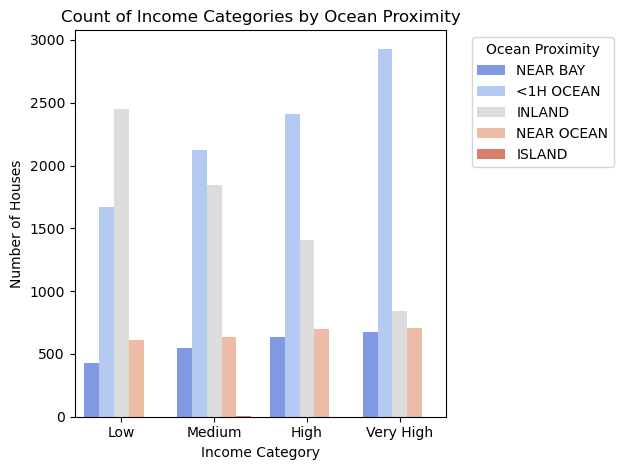

In [114]:
sns.countplot(
    x='income_cat',
    hue='ocean_proximity',
    data=houses_ready,
    palette='coolwarm'
)

plt.title('Count of Income Categories by Ocean Proximity')
plt.xlabel('Income Category')
plt.ylabel('Number of Houses')
plt.legend(title='Ocean Proximity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

3. Create two barplots where you set "y="median_house_value" on both, and the x is first "income cat" and then "ocean_proximity". How does these two graphs complement what you saw in the graph in your previous question?

/var/folders/j5/nn2q62291v59dvdxyx4zf3_c0000gn/T/ipykernel_48750/2032183105.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/j5/nn2q62291v59dvdxyx4zf3_c0000gn/T/ipykernel_48750/2032183105.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


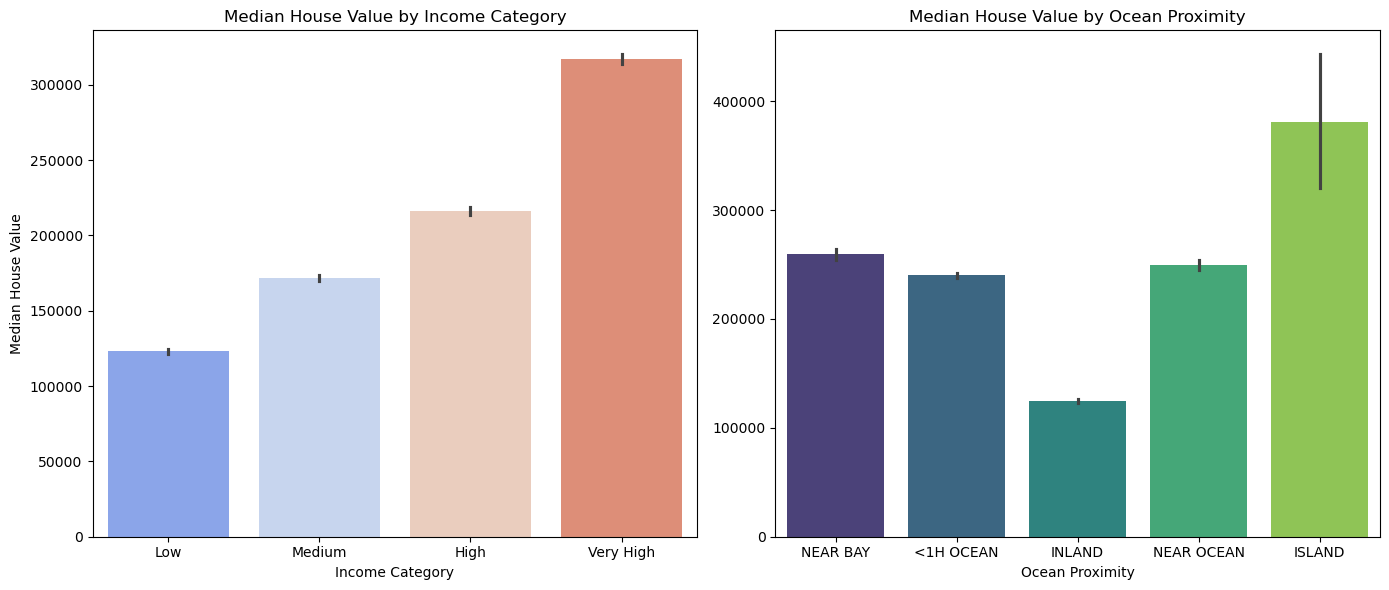

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- First plot: income category vs house value ---
sns.barplot(
    x='income_cat',
    y='median_house_value',
    data=houses_ready,
    ax=axes[0],
    palette='coolwarm'
)
axes[0].set_title('Median House Value by Income Category')
axes[0].set_xlabel('Income Category')
axes[0].set_ylabel('Median House Value')

# --- Second plot: ocean proximity vs house value ---
sns.barplot(
    x='ocean_proximity',
    y='median_house_value',
    data=houses_ready,
    ax=axes[1],
    palette='viridis'
)
axes[1].set_title('Median House Value by Ocean Proximity')
axes[1].set_xlabel('Ocean Proximity')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
print(f"""Graphs complement the idea that the most valuable houses are either on islands or near the ocean/bay. 
      Less valuable houses are placed inland. Also, higher income families tend to own more valuable houses. """)

4. Create a pivoted dataframe where you have the values of the "income cat" column as indices and the values of the "ocean_proximity" column as columns. Also drop the "ISLAND" column that you'll get.

In [127]:
income_ocean_df = pd.pivot_table(
    data=houses_ready,
    index='income_cat',
    columns='ocean_proximity',
    values='median_house_value',
    aggfunc='count'
)

income_ocean_df = income_ocean_df.drop(columns = 'ISLAND')
income_ocean_df



/var/folders/j5/nn2q62291v59dvdxyx4zf3_c0000gn/T/ipykernel_48750/941024194.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  income_ocean_df = pd.pivot_table(


ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_cat,,,,
Low,1669,2449,426,614
Medium,2124,1847,548,636
High,2412,1409,638,701
Very High,2930,844,678,706


5. Turn your pivoted dataframe into a heatmap. The heatmap should have annotations in integer format.

<Axes: xlabel='ocean_proximity', ylabel='income_cat'>

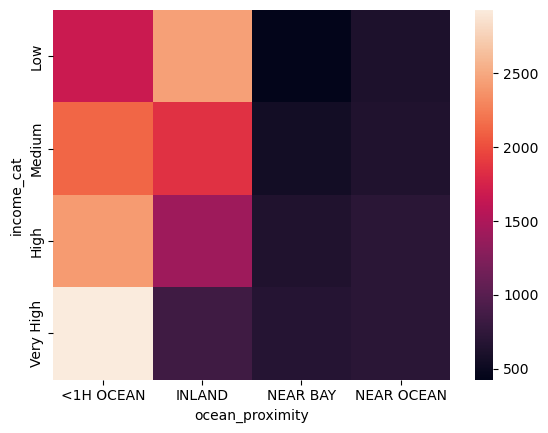

In [128]:
sns.heatmap(data = income_ocean_df )

# Part 3 - Preparing your Data



#### Splitting, Preparing and Engineering some Features

1. Let's drop the "income_cat" column as it has served its purpose already. We don't need for our model as we already have "median income".
Not dropping "incom cat" will lead to multicolinearity.

In [131]:
houses_ready.drop(columns='income_cat', inplace=True)

2. Select your floating point columns and standardize your data by calculating the Z-score. You can apply the `stats.zscore()` method in a lambda function. Save your results to a variable called `z_scored`. 

In [148]:
import scipy.stats as stats
houses_z = houses_ready.apply(
    lambda col: stats.zscore(col) if col.name != 'ocean_proximity' else col
)


In [151]:
houses_z.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_room,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327701,1.052665,0.982224,-0.804958,-0.972133,-0.974710,-0.977332,2.344595,2.129854,0.744324,-0.049604,-1.156010,False,False,False,True,False
1,-1.322710,1.043301,-0.606873,2.045696,1.350628,0.861243,1.669812,2.332068,1.314311,0.390083,-0.092516,-0.995954,False,False,False,True,False
2,-1.332692,1.038619,1.856227,-0.535890,-0.827109,-0.821052,-0.843928,1.782561,1.258844,1.363546,-0.025852,-1.452886,False,False,False,True,False
3,-1.337683,1.038619,1.856227,-0.624357,-0.720124,-0.766300,-0.734067,0.932876,1.165243,0.190268,-0.050337,-0.497621,False,False,False,True,False
4,-1.337683,1.038619,1.856227,-0.462549,-0.613139,-0.760118,-0.629436,-0.012919,1.173043,0.410842,-0.085620,-0.712564,False,False,False,True,False


3. Turn the only categorical columns into dummies. Be vary of the dummy trap, to avoid multicolinearity.

In [150]:
houses_z = pd.get_dummies(houses_z, columns=['ocean_proximity'])

4. Save our predicting variable to `y`.

In [156]:
y = houses_z['median_house_value']

5. Concatenate `z_scored` and `dummies` and drop the predicting variable. Save to the varible `X`.

In [152]:
X = houses_z.drop(columns = 'median_house_value')

In [160]:
#X.head()
y.head()

0    2.129854
1    1.314311
2    1.258844
3    1.165243
4    1.173043
Name: median_house_value, dtype: float64

# Part 4 - Machine Learning 




#### Train, Test, Split

1. Import `train_test_split` and split your data accordingly. Choose an appropriate test size.

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#### Building and Training our Model

2. Build, fit and train a `LinearRegression` model. 

In [175]:
from sklearn.linear_model import LinearRegression
houses_model = LinearRegression()
houses_model.fit(X_train, y_train)


LinearRegression()

In [176]:
y_pred_train = houses_model.predict(X_train)

3. In a scatterplot, visualize the y_train on your x-axis and your predictions on the y-axis. How does your training predictions look? 

Text(0, 0.5, 'Actual Values')

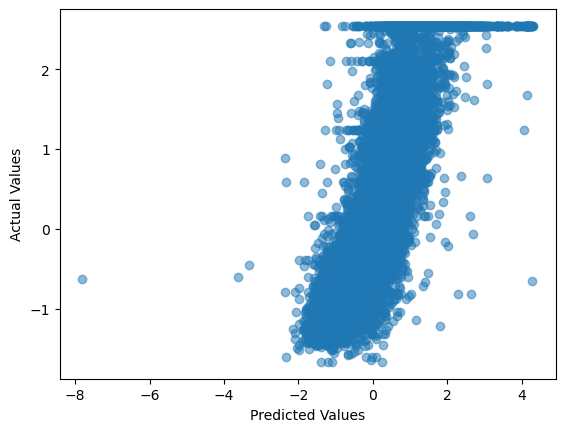

In [177]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_pred_train, y_train, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

4. From the sklearn metrics module, print the mean_squared_error and R^2-score. What does the metrics tell us?

In [178]:
from sklearn import metrics
print('MSE', metrics.mean_squared_error(y_train, y_pred_train))
print('R2', metrics.r2_score(y_train, y_pred_train))

MSE 0.3457127427365809
R2 0.65301786482173


#### Final Predictions

1. Now you are ready to make prediction on the test data. Do that and visualize your results in a new scatterplot.

In [179]:
y_pred_test = houses_model.predict(X_test)

Text(0, 0.5, 'Actual Values')

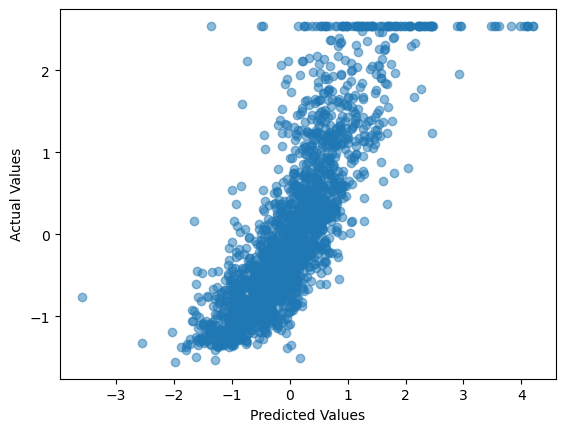

In [180]:
plt.scatter(y_pred_test, y_test, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

2. Print the mean_squared_error and R^2-score again. What has happened?

In [182]:
print('MSE', metrics.mean_squared_error(y_test, y_pred_test))
print('R2', metrics.r2_score(y_test, y_pred_test))

MSE 0.34318935236924075
R2 0.6677166580704852


3. There is another metric called Root mean squared error, Which is the square root of the MSE. Calculate the RMSE.

In [183]:
print("RMSE", metrics.root_mean_squared_error(y_test, y_pred_test))

RMSE 0.5858236529615723


# Bonus Questions 1

1. Create a dataframe with two columns, one consisting of the y_test and one of your model's predictions.

2. Make a series of of your new dataframe, by calculating the predicted error in absolut numbers. Save this series to variable name `absolute_errors`.

3. If you take the mean of your series, you will get the mean absolute errors, which is another metric for Linear Regressions.

# Bonus Question 2 - Build a Random Forest Regressor

1. Build, fit and train a `RandomForestRegressor` model. Do this by following the same staps that you followed when building your `LinearRegression`.

In [4]:
from sklearn.ensemble import RandomForestRegressor

2. Make prediction on the test data and evaluate you results.